**ML - Fall 2023 - Practical 4**

**Support Vector Machine**

**Student Name:** Niki Sepasian<br>
**Student Number:** 400105003

# P0: Intro

Sentiment Analysis is a Natural Language Processing technique that allows us to determine the sentiment or opinion of a given text. It is a very useful technique that allows us to extract insights from social media, customer feedback, product reviews, etc. This assignment focuses on building a sentiment classifier using the SVM algorithm. You are given a dataset of tweets along with their corresponding sentiments. Your task is to build a classifier that can determine the sentiment of a given tweet.

# P1: Data Exploration

The dataset provided to you includes one file: `sentiment.csv`.
Run the below cells to download the data.

In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1XHeTYh-jGBHq1lpbOVq1HX-N4EsUIQgA'
path = 'sentiment.csv'
gdown.download(url, path, quiet=True)
df = pd.read_csv(path, encoding = "ISO-8859-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## The Distribution of Labels

Extract the labels of the Sentiment column and plot the distribution of samples according to it. **(P1-1: 2.5 points)**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_

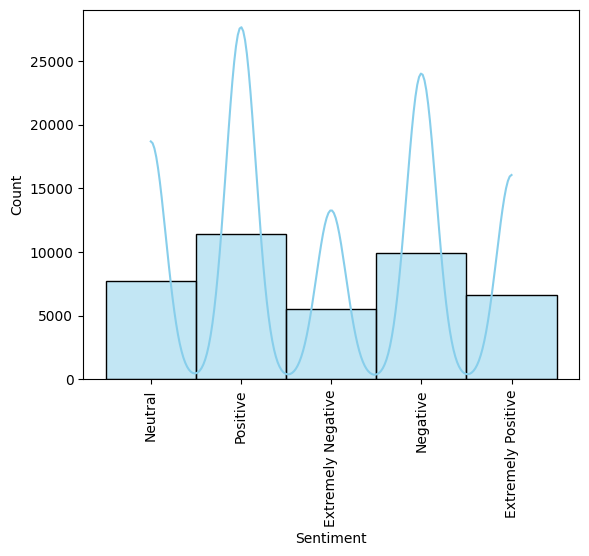

In [3]:
import seaborn as sns
sns.histplot(df, x= 'Sentiment', kde=True, color="skyblue").tick_params(axis='x', rotation=90)

## Texts Distribution

Plot the distribution of tweets according to their lengths. **(P1-2: 2.5 points)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='OriginalTweet', ylabel='Density'>

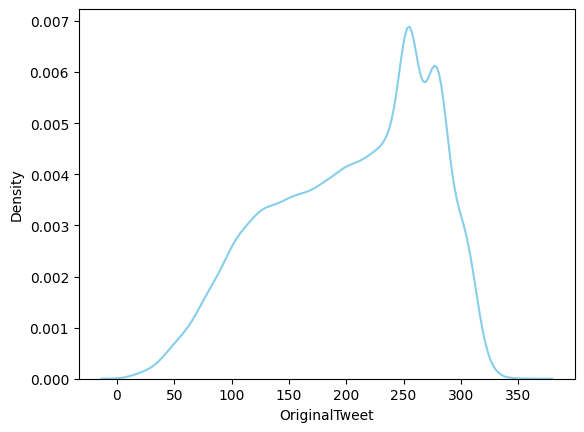

In [4]:
sns.kdeplot(x= df['OriginalTweet'].apply(lambda x: len(x)), color='skyblue')

## Outliers

According to the obtained distributions, reason whether it is necessary to remove outliers or not. If your answer is yes, determine the appropriate remove range and delete these outliers in the dataset cleaning section. **(P1-3: 5 points)**

We use Interquartile Range Method to find values that are on the extreme ends of our dataset. As we can see, none of the values are outside of our calculated fences (we find this lower-upper bound using interquerilte range IQR). This means that we don't need to remove any outliers.

In [5]:
import numpy as np
df['TweetLength']=df['OriginalTweet'].apply(lambda x: len(x))

q1= df['TweetLength'].quantile(0.25)
q3= df['TweetLength'].quantile(0.75)
IQR= q3-q1
lower_fence= q1-1.5*IQR
upper_fence= q3+1.5*IQR

print("lower fence: ", lower_fence)
print("upper_fence: ", upper_fence)

outliers= np.count_nonzero(np.array(~df.loc[:, 'TweetLength'].between(lower_fence, upper_fence, inclusive= 'both'))==True)
print("number of values ouside IQR: ",outliers)

lower fence:  -11.0
upper_fence:  421.0
number of values ouside IQR:  0


## Missing Values

What percentage of dataset rows should be deleted due to missing values? Delete these row in the dataset cleaning section. **(P1-4: 2.5 points)**

In [3]:
print("percentage of missing values: ", (df.isnull().sum().sum()/len(df))*100)
df.dropna()

percentage of missing values:  20.87129771363316


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


## Most Frequent Words

Use the `nltk` library and plot the 30 most frequent words in order of occurrence. Then do this for each set of positive, negative and neutral tweets separately. **(P1-5: 10 points)**

In [4]:
import nltk
words= nltk.tokenize.word_tokenize(' '.join(df['OriginalTweet']))
stopwords = nltk.corpus.stopwords.words('english')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

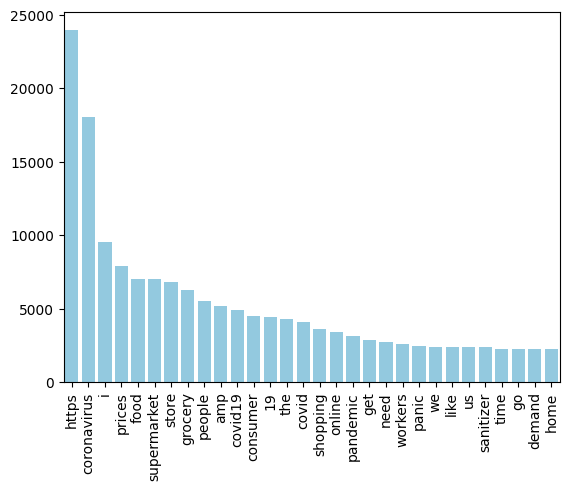

In [7]:
no_punc_and_num= nltk.FreqDist(w.lower() for w in words if (w not in stopwords and w.isalnum()))
first_30= no_punc_and_num.most_common(30)
w, freq= zip(*first_30)

sns.barplot(x= list(w), y= list(freq), color="skyblue").tick_params(axis='x', rotation=90)

In [9]:
import nltk
import matplotlib.pyplot as plt
words= nltk.tokenize.word_tokenize(' '.join(df[df['Sentiment']=='Positive']['OriginalTweet']))
stopwords = nltk.corpus.stopwords.words('english')
no_punc_and_num= nltk.FreqDist(w.lower() for w in words if (w not in stopwords and w.isalnum()))
first_30= no_punc_and_num.most_common(30)
w_pos, freq_pos= zip(*first_30)

words= nltk.tokenize.word_tokenize(' '.join(df[df['Sentiment']=='Negative']['OriginalTweet']))
stopwords = nltk.corpus.stopwords.words('english')
no_punc_and_num= nltk.FreqDist(w.lower() for w in words if (w not in stopwords and w.isalnum()))
first_30= no_punc_and_num.most_common(30)
w_neg, freq_neg= zip(*first_30)

words= nltk.tokenize.word_tokenize(' '.join(df[df['Sentiment']=='Neutral']['OriginalTweet']))
stopwords = nltk.corpus.stopwords.words('english')
no_punc_and_num= nltk.FreqDist(w.lower() for w in words if (w not in stopwords and w.isalnum()))
first_30= no_punc_and_num.most_common(30)
w_neu, freq_neu= zip(*first_30)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

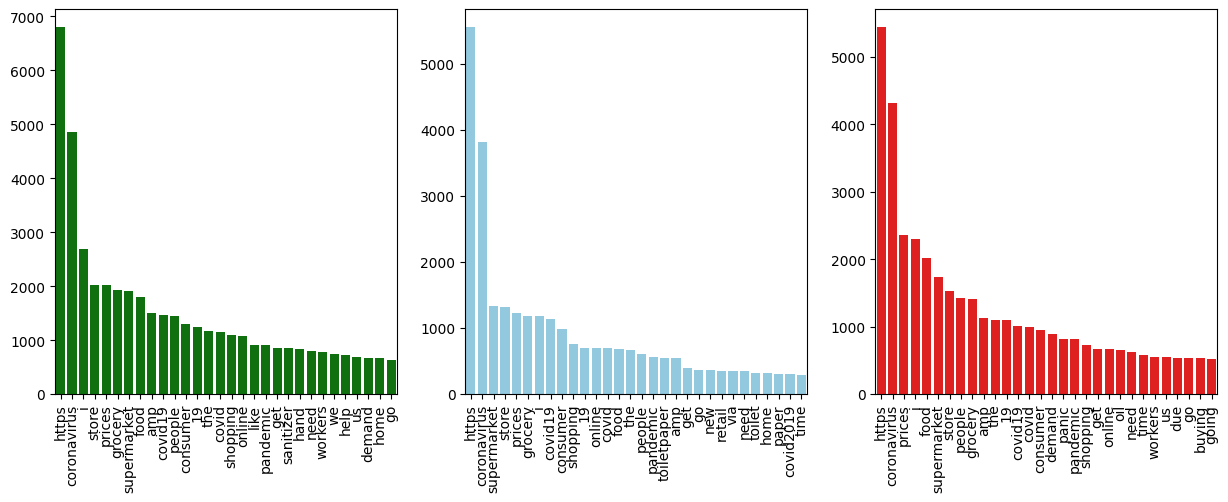

In [10]:
fig,axs= plt.subplots(ncols=3, figsize=(15, 5))
sns.barplot(x= list(w_pos), y= list(freq_pos), color="green", ax=axs[0]).tick_params(axis='x', rotation=90)
sns.barplot(x= list(w_neu), y= list(freq_neu), color="skyblue", ax=axs[1]).tick_params(axis='x', rotation=90)
sns.barplot(x= list(w_neg), y= list(freq_neg), color="red", ax=axs[2]).tick_params(axis='x', rotation=90)

# P2: Preprocessing

## Dataset Cleaning

Remove unrelevant columns and do other necessary cleanings. **(P2-1: 5 points)**

In [8]:
relevant_df= df[['OriginalTweet', 'Sentiment']]
relevant_df.head(5)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Labeling

Based on the `Sentiment` column, generate 3 labels by considering the extremely positive tweets as positive and the extremely negative ones as negatives. **(P2-2: 2.5 points)**

In [9]:
relevant_df['Sentiment']= relevant_df['Sentiment'].map({'Extremely Negative': 'Negative', 'Negative': 'Negative', 'Extremely Positive': 'Positive', 'Positive': 'Positive', 'Neutral': 'Neutral'})
relevant_df.head(5)

/tmp/ipykernel_46/869196995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['Sentiment']= relevant_df['Sentiment'].map({'Extremely Negative': 'Negative', 'Negative': 'Negative', 'Extremely Positive': 'Positive', 'Positive': 'Positive', 'Neutral': 'Neutral'})


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


## Text Cleaning

Remove urls from tweets with regex. (Use pattern `r'https?://\S+|www\.\S+'`) **(P2-3: 2.5 points)**

In [10]:
import re
relevant_df['OriginalTweet']=relevant_df['OriginalTweet'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x))
relevant_df.head(5)

/tmp/ipykernel_46/2320027846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['OriginalTweet']=relevant_df['OriginalTweet'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x))


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv and and,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


Remove everything except alphabetical and numerical characters. (Use pattern `[^a-zA-Z0-9]`) **(P2-4: 2.5 points)**

In [11]:
relevant_df['OriginalTweet']=relevant_df['OriginalTweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))
relevant_df.head(5)

/tmp/ipykernel_46/2534556373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['OriginalTweet']=relevant_df['OriginalTweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))


,OriginalTweet,Sentiment
0,MeNyrbie Phil Gahan Chrisitv and and,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COV...,Negative


Lower all letters. Then use `nltk` and tokenize tweets. Then replace each word with its root and remove the stopwords. **(P2-5: 10 points)**

In [12]:
relevant_df['ProcessedTweet']=relevant_df['OriginalTweet'].apply(lambda x: nltk.tokenize.word_tokenize(x.lower()))

/tmp/ipykernel_46/3434350668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['ProcessedTweet']=relevant_df['OriginalTweet'].apply(lambda x: nltk.tokenize.word_tokenize(x.lower()))


In [13]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords= set(stopwords.words('english'))
stemmer= SnowballStemmer('english')

relevant_df['ProcessedTweet']= relevant_df['ProcessedTweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x if word not in stopwords]))   
relevant_df.head(5)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/tmp/ipykernel_46/298994448.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['ProcessedTweet']= relevant_df['ProcessedTweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x if word not in stopwords]))


,OriginalTweet,Sentiment,ProcessedTweet
0,MeNyrbie Phil Gahan Chrisitv and and,Neutral,menyrbi phil gahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia Woolworths to give elde...,Positive,coronavirus australia woolworth give elder dis...
3,My food stock is not the only one which is emp...,Positive,food stock one empti pleas panic enough food e...
4,Me ready to go at supermarket during the COV...,Negative,readi go supermarket covid19 outbreak paranoid...


## Feature Generation

Use `CountVectorizer` class (belonging to `sklearn`) construct a feature vector from each tweet. **(P2-6: 5 points)**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

x= CountVectorizer(max_features= 1000).fit_transform(relevant_df['ProcessedTweet']).toarray()
y= relevant_df['Sentiment']

# P3: Modeling

Convert the dataset to a dataframe (or some `numpy` arrays) and split it into train and test sets. **(P3-1: 5 points)**

In [15]:
from sklearn.model_selection import train_test_split
    
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)
print(x.shape)
print(y.shape)

(41157, 1000)
(41157,)


Use the `SVC` class (belonging to `sklearn`) to train a SVM classifier. (**P3-2: 5 points**)

In [13]:
from sklearn.svm import SVC

sklearn_model= SVC(kernel= 'linear')
sklearn_model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(kernel='linear')

Complete the definition of the following class to implement a SVM classifier capable of separating only the positive and negative classes. **(P3-3: 15 points)**


In [17]:
!pip install cvxopt
from cvxopt import matrix, solvers

In [18]:
class SVM:
    def __init__(self):
        self.weights= None
        self.bias= None
        
    def fit(self, X, y):
        n, m= X.shape
        y_val= (np.where(y=='Positive', 1, -1)).reshape(-1, 1)

        p= matrix((np.outer(y_val, y_val)* (X @ X.T)), tc='d')
        
        q= matrix(-np.ones((n, 1)), tc='d')
        
        g= matrix((np.vstack((-np.eye(n), np.eye(n)))), tc='d')
        h= matrix((np.hstack((np.zeros(n), 0.1*np.ones(n)))), tc='d')
        
        a= matrix((y_val.reshape(1, -1)), tc='d')
        b= matrix(np.array([0.0]), tc='d')


        solution= solvers.qp(p, q, g, h, a, b)
        lagrange= np.array(solution['x'])
        indices= (lagrange>1e-4).flatten()
        lagrange_mults= lagrange[indices]
        sv= X[indices]
        sv_label= y_val[indices]
        
        self.weights= (lagrange_mults*sv_label.T) @ sv
        self.bias= np.mean(sv_label-(sv @ self.weights.T))

        return self

                  
    def transform(self, X):
        n, m= x.shape
        y_pred= np.sign((X @ self.weights.T)+self.bias)
        y_pred= np.where(y_pred==1, 'Positive', 'Negative')
        return y_pred

Train the binary SVM classifier using the class you have implemented. **(P3-4: 5 points)**

In [20]:
scratch_model= SVM()
scratch_model.fit(x_train[:15000], y_train[:15000])
#due to kaggle's memory limit

     pcost       dcost       gap    pres   dres
 0: -4.6013e+03 -4.1602e+03  2e+05  3e+01  1e-13
 1: -8.9434e+02 -3.9853e+03  2e+04  3e+00  8e-14
 2: -5.5935e+02 -3.0228e+03  4e+03  4e-01  2e-14
 3: -5.2662e+02 -1.0553e+03  6e+02  1e-02  1e-14
 4: -6.0526e+02 -8.3195e+02  2e+02  5e-03  1e-14
 5: -6.4287e+02 -7.5432e+02  1e+02  2e-03  1e-14
 6: -6.6409e+02 -7.1415e+02  5e+01  7e-04  1e-14
 7: -6.7340e+02 -6.9759e+02  2e+01  3e-04  1e-14
 8: -6.7901e+02 -6.8828e+02  9e+00  8e-05  1e-14
 9: -6.8146e+02 -6.8453e+02  3e+00  2e-05  1e-14
10: -6.8219e+02 -6.8344e+02  1e+00  6e-06  2e-14
11: -6.8261e+02 -6.8287e+02  3e-01  6e-07  2e-14
12: -6.8271e+02 -6.8275e+02  4e-02  4e-15  2e-14
13: -6.8273e+02 -6.8273e+02  3e-03  2e-14  2e-14
14: -6.8273e+02 -6.8273e+02  2e-04  2e-14  2e-14
Optimal solution found.


# P4: Evaluation

Using the model you trained using `sklearn`, predict the labels of the test set. **(P4-1: 5 points)**

In [14]:
sklearn_pred= sklearn_model.predict(x_test)

Using the model you trained from scratch, predict the labels of the test set. **(P4-2: 5 points)**

In [21]:
scratch_pred= scratch_model.transform(x_test)

Plot the normalized confusion matrix of the predictions for each model. **(P4-3: 5 points)**

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

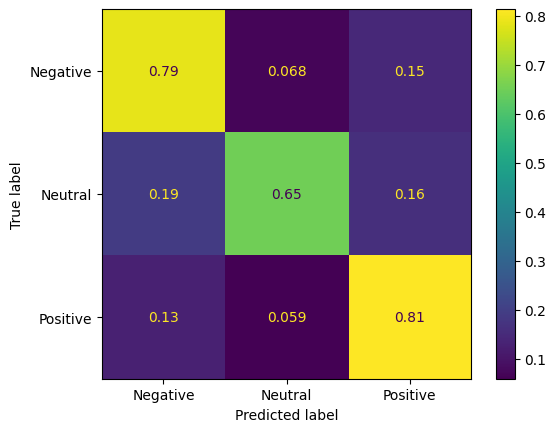

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sklearn_confmat= confusion_matrix(sklearn_pred, y_test, normalize='true')
sk_disp= ConfusionMatrixDisplay(confusion_matrix= sklearn_confmat,display_labels=sklearn_model.classes_)
sk_disp.plot()

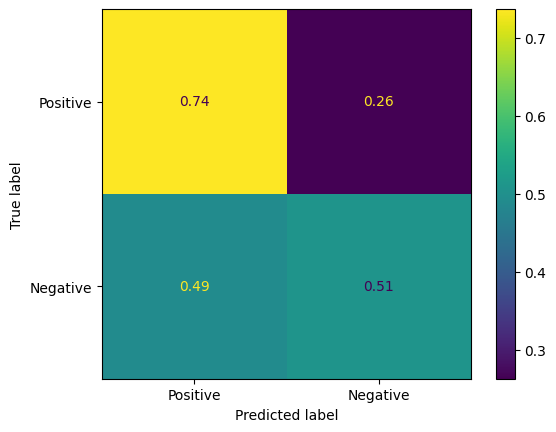

In [24]:
y_test_conf= np.where(y_test=='Positive', 'Positive', 'Negative')
scratch_confmat= confusion_matrix(scratch_pred[:, 0], y_test_conf, normalize='true')
scratch_disp= ConfusionMatrixDisplay(confusion_matrix= scratch_confmat, display_labels=['Positive','Negative'])
scratch_disp.plot()

# P5: Neural Net

Using all you have learned about neural networks, train a neural net to classify tweets as `[positive, negative, or neutral]` (**P5: 5 points**)

In [16]:
encoding= {'Negative':-1, 'Neutral':0, 'Positive':1}
y_input= relevant_df['Sentiment'].map(encoding).values
nn_x_tr, nn_x_test, nn_y_tr, nn_y_test = train_test_split(relevant_df['OriginalTweet'], y_input, train_size=0.8, shuffle=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Conv1D, Dropout,SpatialDropout1D, GlobalMaxPooling1D, BatchNormalization, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


y_train_nn= LabelEncoder().fit_transform(nn_y_tr)
tokenizer= Tokenizer()
tokenizer.fit_on_texts(nn_x_tr)
x_train_nn= tokenizer.texts_to_sequences(nn_x_tr)
x_train_nn= pad_sequences(x_train_nn, padding='post', maxlen=100)

model= Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 16, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_nn, y_train_nn, epochs= 3, validation_split=0.1)

# num_words=10000, oov_token='<OOV>'
y_test_nn= LabelEncoder().fit_transform(nn_y_test)
tokenizer= Tokenizer()
tokenizer.fit_on_texts(nn_x_test)
x_test_nn= tokenizer.texts_to_sequences(nn_x_test)
x_test_nn= pad_sequences(x_test_nn, padding='post')

loss, accuracy= model.evaluate(x_test_nn, y_test_nn)

Epoch 1/3
926/926 [==============================] - 35s 32ms/step - loss: 0.9678 - accuracy: 0.4664 - val_loss: 0.8863 - val_accuracy: 0.6086
Epoch 2/3
926/926 [==============================] - 8s 9ms/step - loss: 0.7432 - accuracy: 0.6906 - val_loss: 0.5896 - val_accuracy: 0.7777
Epoch 3/3
926/926 [==============================] - 8s 8ms/step - loss: 0.5457 - accuracy: 0.8060 - val_loss: 0.5125 - val_accuracy: 0.8084
